In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
import joblib

In [3]:
# Baca file
zoo = pd.read_csv('zoo.csv')
classes = pd.read_csv('class.csv')

In [21]:
# Baca dataset utama dan mapping class
zoo = pd.read_csv('zoo.csv')
classes = pd.read_csv('class.csv')

# Gabungkan berdasarkan class_type dan Class_Number
df = zoo.merge(classes, left_on='class_type', right_on='Class_Number', how='left')

# Hapus kolom yang tidak diperlukan
df.drop(['Class_Number', 'Number_Of_Animal_Species_In_Class', 'Animal_Names'], axis=1, inplace=True)

# Ubah nama kolom target
df.rename(columns={'Class_Type': 'animal_class'}, inplace=True)

print("--- 5 Baris Pertama ---")
print(df.head())


--- 5 Baris Pertama ---
  animal_name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   class_type animal_class  
0           1  

C:\Users\asus\AppData\Local\Temp\ipykernel_15156\2081357266.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='animal_class', data=df, palette='viridis')


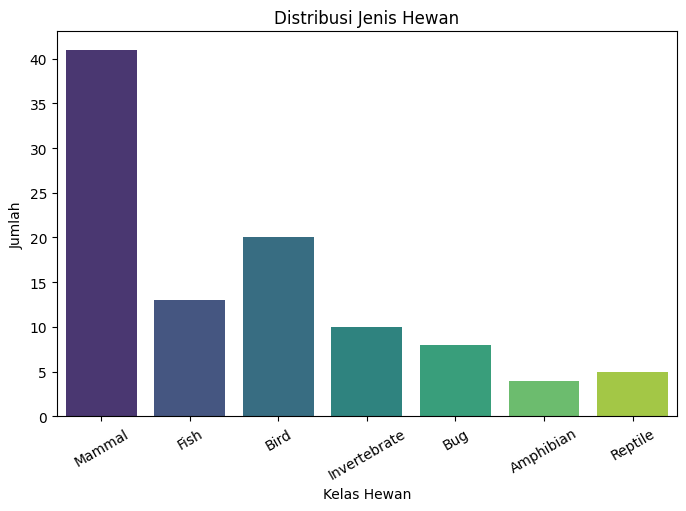

In [25]:
plt.figure(figsize=(8, 5))
sns.countplot(x='animal_class', data=df, palette='viridis')
plt.title('Distribusi Jenis Hewan')
plt.xlabel('Kelas Hewan')
plt.ylabel('Jumlah')
plt.xticks(rotation=30)
plt.show()

In [29]:
X = df.drop(columns=['animal_name', 'animal_class', 'class_type'])
y = df['animal_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

=== MODEL A: Overfit ===
[[ 2  0  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]
 [ 0  0  4  0  1  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0  0  0  0 15  0]
 [ 1  0  0  0  0  0  0]]
              precision    recall  f1-score   support

   Amphibian       0.67      1.00      0.80         2
        Bird       1.00      1.00      1.00         3
         Bug       1.00      0.80      0.89         5
        Fish       1.00      1.00      1.00         2
Invertebrate       0.75      1.00      0.86         3
      Mammal       1.00      1.00      1.00        15
     Reptile       0.00      0.00      0.00         1

    accuracy                           0.94        31
   macro avg       0.77      0.83      0.79        31
weighted avg       0.92      0.94      0.92        31



c:\KULIAH\MATA KULIAH SEMESTER 5\PEMBELAJARAN MESIN\TA5 Decision Tree\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\KULIAH\MATA KULIAH SEMESTER 5\PEMBELAJARAN MESIN\TA5 Decision Tree\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\KULIAH\MATA KULIAH SEMESTER 5\PEMBELAJARAN MESIN\TA5 Decision Tree\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_d

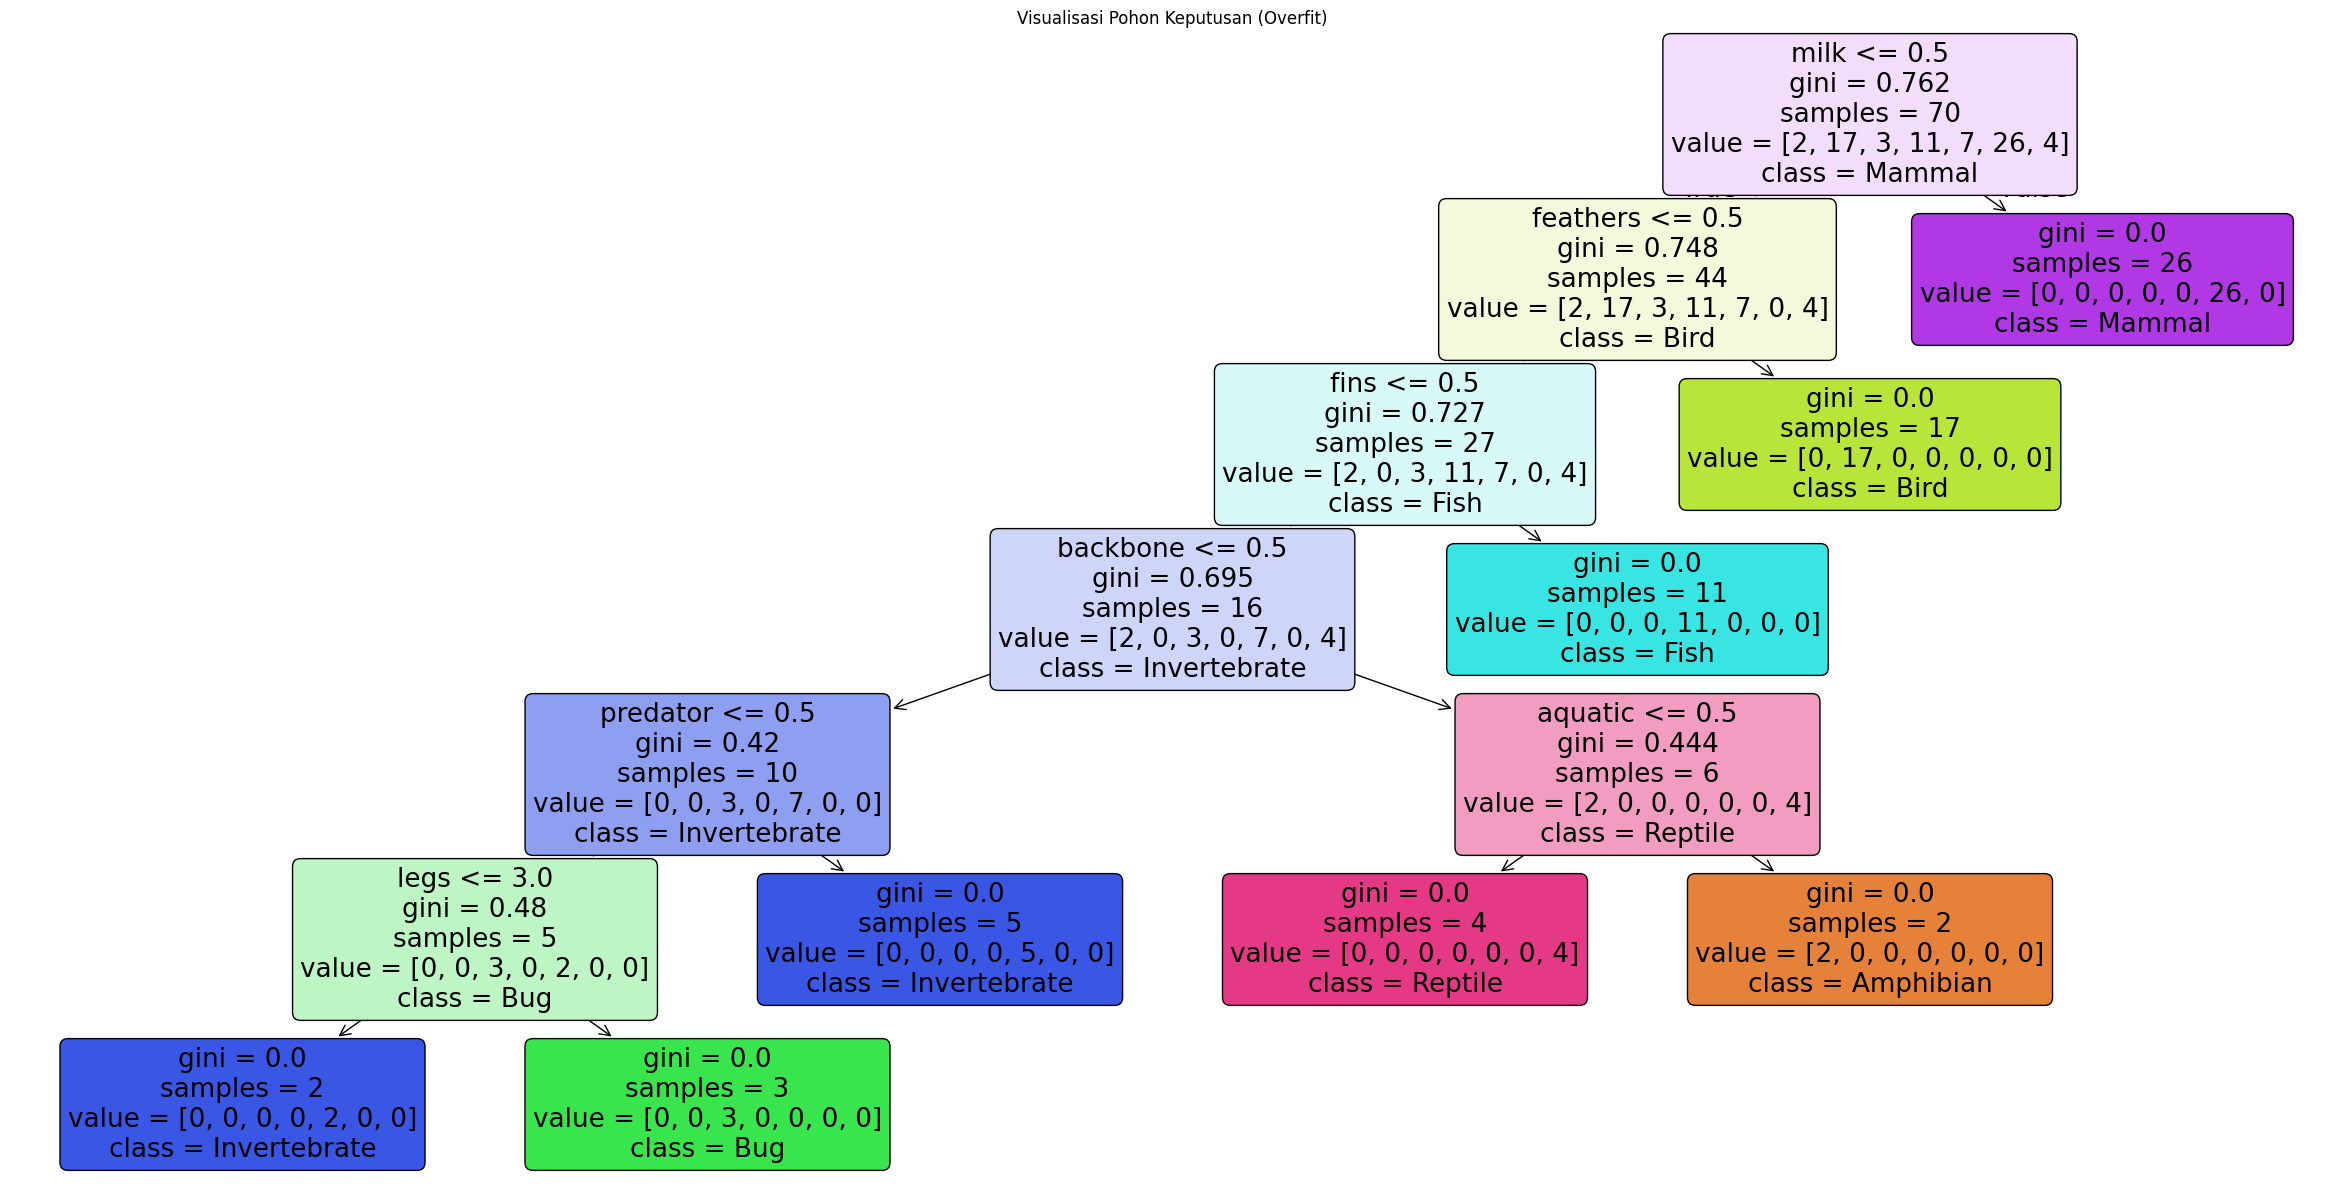

In [44]:
model_overfit = DecisionTreeClassifier(random_state=42)
model_overfit.fit(X_train, y_train)

pred_overfit = model_overfit.predict(X_test)

print("=== MODEL A: Overfit ===")
print(confusion_matrix(y_test, pred_overfit))
print(classification_report(y_test, pred_overfit))

# Visualisasi
plt.figure(figsize=(30, 15))
plot_tree(model_overfit,
          feature_names=X.columns,
          class_names=sorted(df['animal_class'].unique()),
          filled=True, rounded=True)
plt.title("Visualisasi Pohon Keputusan (Overfit)")
plt.show()


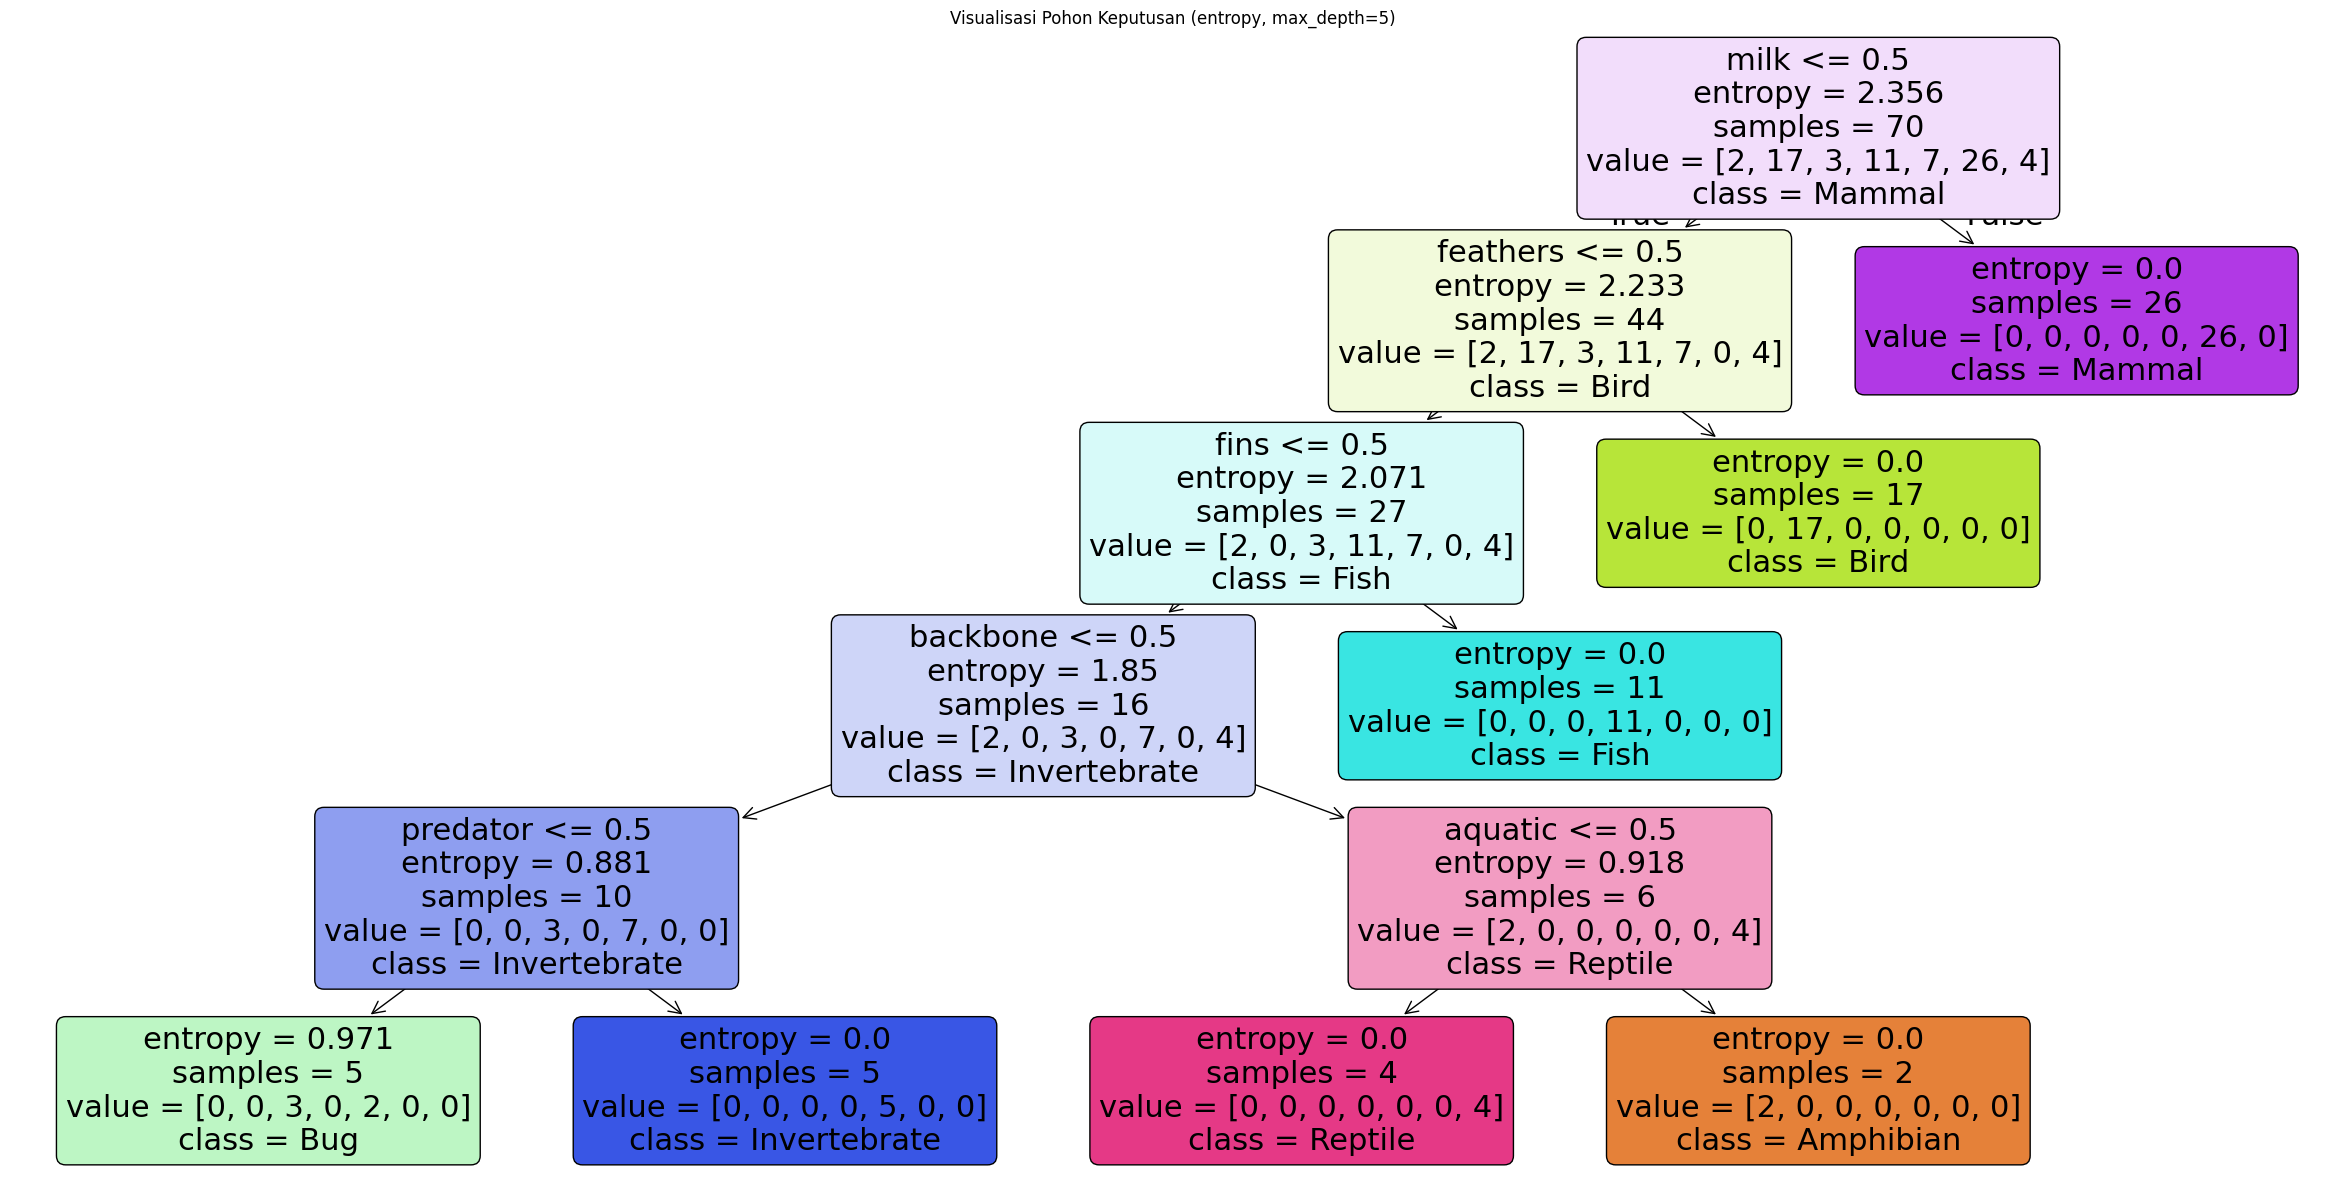

In [38]:
model_pruned = DecisionTreeClassifier(
    criterion='entropy',     # biar pembagian lebih merata
    max_depth=5,             # sedikit lebih dalam dari 4
    min_samples_split=3,     # biar tiap node punya minimal 3 sample
    random_state=42
)
model_pruned.fit(X_train, y_train)

plt.figure(figsize=(30, 15))  # lebih lebar biar proporsional
plot_tree(model_pruned,
          feature_names=X.columns,
          class_names=sorted(df['animal_class'].unique()),
          filled=True, rounded=True)
plt.title("Visualisasi Pohon Keputusan (entropy, max_depth=5)")
plt.show()

<Figure size 800x600 with 0 Axes>

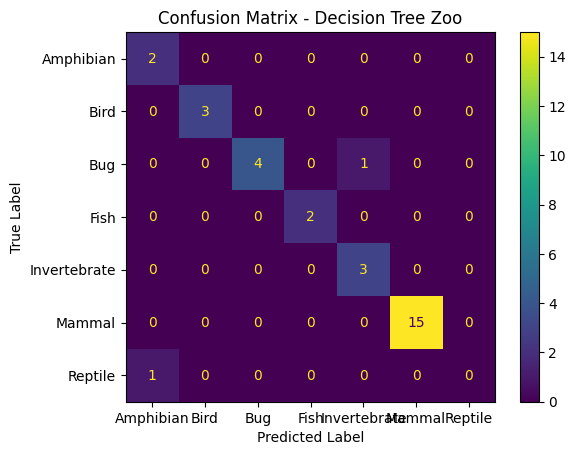

=== Laporan Klasifikasi ===
              precision    recall  f1-score   support

   Amphibian       0.67      1.00      0.80         2
        Bird       1.00      1.00      1.00         3
         Bug       1.00      0.80      0.89         5
        Fish       1.00      1.00      1.00         2
Invertebrate       0.75      1.00      0.86         3
      Mammal       1.00      1.00      1.00        15
     Reptile       0.00      0.00      0.00         1

    accuracy                           0.94        31
   macro avg       0.77      0.83      0.79        31
weighted avg       0.92      0.94      0.92        31

Akurasi Model: 93.55%


c:\KULIAH\MATA KULIAH SEMESTER 5\PEMBELAJARAN MESIN\TA5 Decision Tree\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\KULIAH\MATA KULIAH SEMESTER 5\PEMBELAJARAN MESIN\TA5 Decision Tree\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\KULIAH\MATA KULIAH SEMESTER 5\PEMBELAJARAN MESIN\TA5 Decision Tree\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_d

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# === Load dataset gabungan ===
zoo = pd.read_csv('zoo.csv')
classes = pd.read_csv('class.csv')

df = zoo.merge(classes, left_on='class_type', right_on='Class_Number', how='left')
df.drop(['Class_Number', 'Number_Of_Animal_Species_In_Class', 'Animal_Names'], axis=1, inplace=True)
df.rename(columns={'Class_Type': 'animal_class'}, inplace=True)

# === Pisahkan fitur dan label ===
X = df.drop(columns=['animal_name', 'animal_class', 'class_type'])
y = df['animal_class']

# === Split data (70% train, 30% test) ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# === Latih model Decision Tree ===
model = DecisionTreeClassifier(random_state=42)  # full depth (overfit)
model.fit(X_train, y_train)

# === Prediksi ===
y_pred = model.predict(X_test)

# === Confusion Matrix ===
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(df['animal_class'].unique()))

plt.figure(figsize=(8, 6))
disp.plot(cmap='viridis', colorbar=True)
plt.title('Confusion Matrix - Decision Tree Zoo')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# === Laporan Evaluasi ===
print("=== Laporan Klasifikasi ===")
print(classification_report(y_test, y_pred))
print("Akurasi Model: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))


In [42]:
acc_overfit = model_overfit.score(X_test, y_test)
acc_pruned = model_pruned.score(X_test, y_test)

print(f"Akurasi Model A (Overfit) : {acc_overfit:.2f}")
print(f"Akurasi Model B (Pruned)  : {acc_pruned:.2f}")


Akurasi Model A (Overfit) : 0.94
Akurasi Model B (Pruned)  : 0.94


C:\Users\asus\AppData\Local\Temp\ipykernel_15156\720082915.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pentingnya', y='Fitur', data=feature_importance, palette='mako')


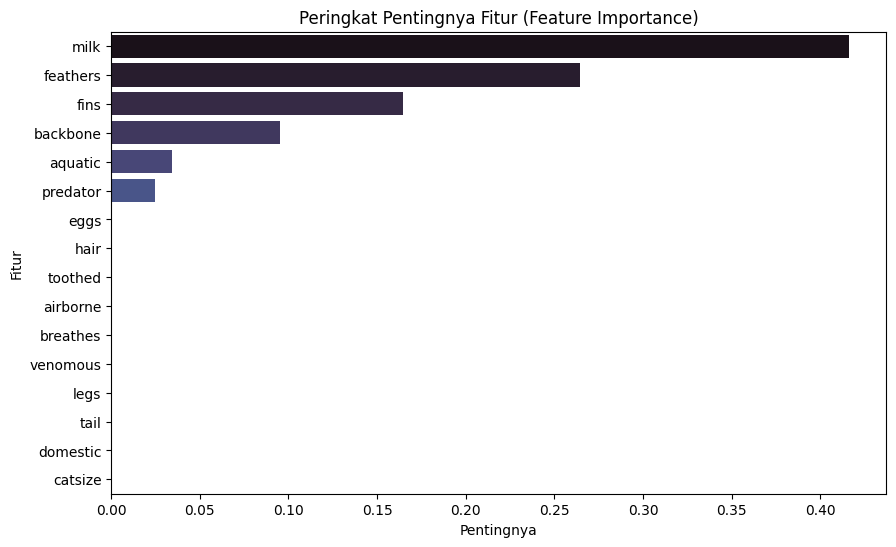

In [43]:
feature_importance = pd.DataFrame({
    'Fitur': X.columns,
    'Pentingnya': model_pruned.feature_importances_
}).sort_values(by='Pentingnya', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Pentingnya', y='Fitur', data=feature_importance, palette='mako')
plt.title('Peringkat Pentingnya Fitur (Feature Importance)')
plt.show()


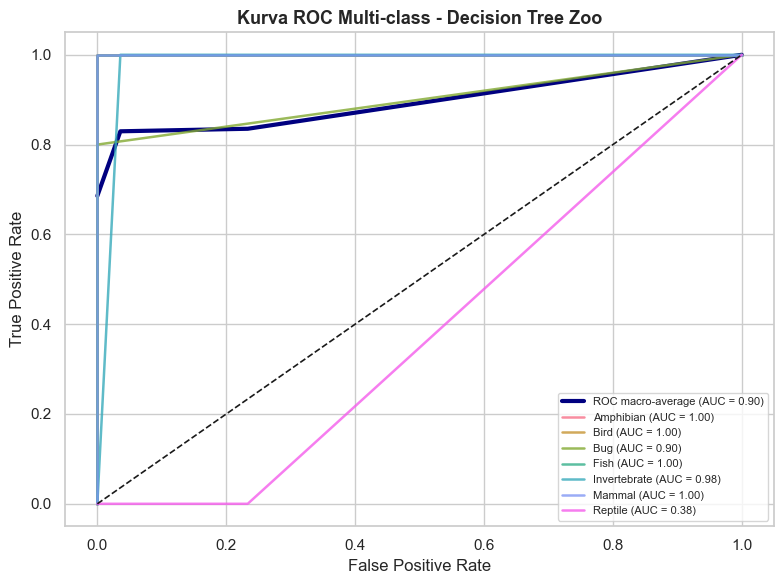

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

# Macro-average ROC
plt.plot(all_fpr, mean_tpr, color='navy',
         label='ROC macro-average (AUC = {:.2f})'.format(roc_auc["macro"]),
         linewidth=3)

# ROC per kelas dengan warna halus
colors = sns.color_palette("husl", n_classes)
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=1.8, alpha=0.8,
             label='{} (AUC = {:.2f})'.format(sorted(y.unique())[i], roc_auc[i]))

# Diagonal referensi
plt.plot([0, 1], [0, 1], 'k--', lw=1.2)

# Style chart
plt.title('Kurva ROC Multi-class - Decision Tree Zoo', fontsize=13, fontweight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right', fontsize=8, frameon=True)
plt.tight_layout()
plt.show()


In [37]:
# Simpan model pruned sebagai model final
joblib.dump(model_pruned, 'decision_tree_zoo.pkl')
print("Model berhasil disimpan sebagai 'decision_tree_zoo.pkl'")

Model berhasil disimpan sebagai 'decision_tree_zoo.pkl'
